## Example of Quantization

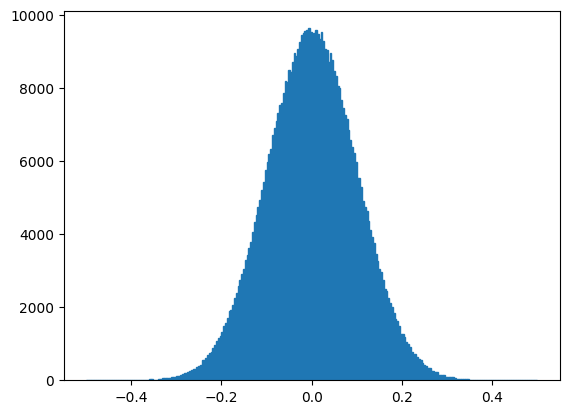

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes, mark_inset


# Set the seed for numpy to ensure reproducibility
np.random.seed(0)
f = np.random.normal(0, 0.1, 600000)

plt.hist(f, bins=250, range=(-0.5,0.5), edgecolor="C0")
plt.show()

$$ f  = \frac{{f_{\text{{max}}} - f_{\text{{min}}}}}{{q_{\text{{max}}} - q_{\text{{min}}}}} \cdot (q - Z) = S \cdot (q - Z) $$

In [2]:
Z = 0
S = (f.max() - f.min()) / (127 - (-128))

q = (f / S + Z).clip(-128, 127).round().astype(np.int8)
f_quantized = S * (q - Z)
print(f[:3])
print(q[:3])
print(f_quantized[:3])

[0.17640523 0.04001572 0.0978738 ]
[47 11 26]
[0.17655287 0.04132088 0.09766755]


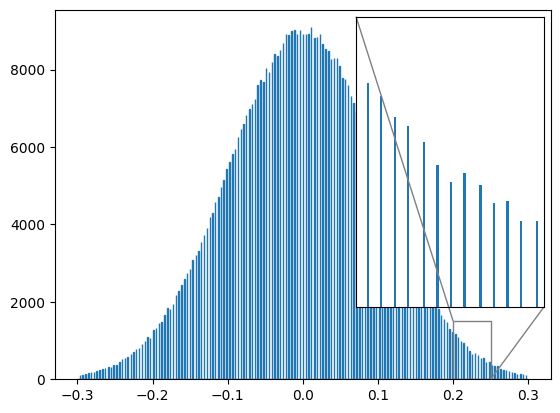

In [3]:
# Create histogram
fig, ax = plt.subplots()
ax.hist(f_quantized, bins=1000, range=(-0.3, 0.3), edgecolor="C0")

# Create zoom inset
axins = zoomed_inset_axes(ax, 5, loc='upper right')
axins.hist(f_quantized, bins=1000, range=(-0.3, 0.3))

x1, x2, y1, y2 = 0.2, 0.25, 0, 1500
axins.set_xlim(x1, x2)
axins.set_ylim(y1, y2)
axins.axes.xaxis.set_visible(False)
axins.axes.yaxis.set_visible(False)
mark_inset(ax, axins, loc1=2, loc2=4, fc="none", ec="0.5")
plt.show()